In [8]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

In [9]:
#Import data
X_train = np.loadtxt('X_train.txt', delimiter = ',')
X_val = np.loadtxt('X_val.txt', delimiter = ',')
y_train = np.loadtxt('y_train.txt', delimiter = ',')
y_val = np.loadtxt('y_val.txt', delimiter = ',')

In [10]:
#Create objective function

def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    #Calculate number of features, initialize unregularized objective
    num_instances = X.shape[0]
    unreg_obj = 0
    
    #Calculate unregularized objective
    for i in range(num_instances):
        unreg_obj += np.logaddexp(0, -y[i] * np.dot(theta, X[i]))    
    unreg_obj = unreg_obj / num_instances
    
    #Calculate regularized objective
    reg_obj = l2_param * np.dot(theta, theta)
    
    #Calculate total objective
    objective = unreg_obj + reg_obj
    return objective

In [11]:
#Complete fit logistic regression function

def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    #Calculate number of features and objective, initialize theta
    num_features = X.shape[1]
    theta_initial = np.random.rand(num_features)
    objective = partial(objective_function, X = X, y = y, l2_param = l2_param)    

    #Use minimize from scipy.optimize to optimize model
    theta_optimal = minimize(objective, theta_initial).x
    return theta_optimal

In [12]:
#Set standard scaler
ss = StandardScaler()

#Scale X
X_train = ss.fit_transform(X_train)
X_val = ss.fit_transform(X_val)

#Change 0 values to -1 for y
y_train[y_train == 0] = -1
y_val[y_val == 0] = -1

#Create bias term for X
X_train = np.append(10 * np.ones((len(X_train), 1)), X_train, axis = 1)
X_val = np.append(10 * np.ones((len(X_val), 1)), X_val, axis = 1)

#Train model and print optima theta values
theta = fit_logistic_reg(X_train, y_train, f_objective, l2_param = 1)
print(f"Optimal theta:\n {theta}")

Optimal theta:
 [ 0.00236217  0.0009574  -0.00029946  0.00302104  0.105343   -0.00358779
 -0.00135977 -0.00385486 -0.0007892  -0.00114331 -0.07179738  0.00655017
 -0.00451114  0.01126146 -0.00386679 -0.0027117   0.00150394 -0.00278449
 -0.00919176 -0.00682377 -0.01027322]


In [13]:
#Find optimal l2 regularization parameter

def log_likelihood(theta, X, y):
    #Determine number of instances, initialize log likelihood
    num_instances = X.shape[0]
    ll = 0
    
    #Calculate loss, return negative loss
    for i in range(num_instances):
        ll += np.logaddexp(0, -y[i]*np.dot(theta, X[i]))
    return ll

In [14]:
#Create list for l2 parameters, initialize validation log likelihood list
l2_list = 10.**np.arange(-10, 5)
val_ll = []

#Calculate validation log likelihood for each l2 param
for l2 in l2_list:
    theta_optimal = fit_logistic_reg(X_train, y_train, f_objective, l2_param = l2)
    ll = log_likelihood(theta_optimal, X_val, y_val)
    val_ll.append(ll)

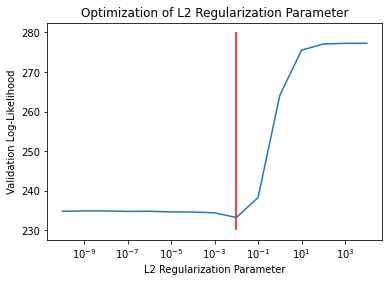

In [15]:
#Plot results
plt.plot(l2_list, val_ll)
plt.xscale('log')
plt.vlines(x = 10**-2, ymin = 230, ymax = 280, color = 'red')
plt.xlabel('L2 Regularization Parameter')
plt.ylabel('Validation Log-Likelihood')
plt.title('Optimization of L2 Regularization Parameter')
plt.show()